Computation of the Kac polynomials for the tennis-racket quiver with g loops, r arrows between the two vertices in dimension $(d_1,d_2)$

Author: Lucien Hennecart

Rings and variables

In [1]:
R.<q> = PolynomialRing(QQ)
K = R.fraction_field()
iq = ~q
S.<x1,x2> = LazyPowerSeriesRing(K)

Basic functions

In [2]:
def produitbilin(l1, l2):
    l1c = Partition(l1).conjugate()
    l2c = Partition(l2).conjugate()
    return ZZ.sum(a * b for a, b in zip(l1c, l2c))

def phi(r):
    return R.prod(1 - q**(-i) for i in range(1, r + 1))

def b(l):
    lc = Partition(l).conjugate() + [0]
    return ZZ.prod(phi(lc[i] - lc[i + 1]) for i in range(len(lc) - 1))

Tools

In [3]:
def dessine(poly):
    """
    draw a polynomial
    """
    coeffs = list(poly)
    maxi = max(coeffs)
    values = [v / maxi for v in coeffs]
    return list_plot(values)

Computation using power series

In [17]:
def polynomeP(r, g):
    return S(lambda n: K.sum(q**(r * produitbilin(p1, p2) + g * produitbilin(p2, p2))
        * iq**(produitbilin(p1, p1) + produitbilin(p2, p2)) / (b(p1) * b(p2)) * x1**i * x2**(n - i)
         for i in range(n + 1) for p1 in Partitions(i) for p2 in Partitions(n - i)))

def serieH(r, g):
    return polynomeP(r, g).log()

def polyH(r, g, d1, d2):
    ser = serieH(r, g)
    d = ZZ(d1).gcd(d2)
    return d * ser[d1 + d2][d1, d2]

def KacPolA(d1, d2, r, g):
    d1 = ZZ(d1)
    d2 = ZZ(d2)
    d = d1.gcd(d2)
    A = R.sum(moebius(i) * polyH(r, g, d1 // i, d2 // i)(q**i) for i in d.divisors())
    return A * ((q - 1) / d)

Example 1

In [18]:
d1 = 3
d2 = 3
r = 4
g = 5
KacPolA(d1, d2, r, g) * q**(-1-d2*(g-1))

q^51 + q^50 + 3*q^49 + 5*q^48 + 8*q^47 + 12*q^46 + 19*q^45 + 25*q^44 + 36*q^43 + 48*q^42 + 62*q^41 + 79*q^40 + 100*q^39 + 120*q^38 + 146*q^37 + 173*q^36 + 201*q^35 + 232*q^34 + 266*q^33 + 297*q^32 + 333*q^31 + 369*q^30 + 403*q^29 + 440*q^28 + 478*q^27 + 512*q^26 + 550*q^25 + 588*q^24 + 622*q^23 + 660*q^22 + 695*q^21 + 724*q^20 + 749*q^19 + 767*q^18 + 768*q^17 + 762*q^16 + 740*q^15 + 704*q^14 + 658*q^13 + 605*q^12 + 538*q^11 + 472*q^10 + 401*q^9 + 326*q^8 + 254*q^7 + 185*q^6 + 121*q^5 + 72*q^4 + 37*q^3 + 15*q^2 + 5*q + 1

Example 2

In [19]:
d1 = 3
d2 = 3
g = 2
r = 4
A = R(KacPolA(d1,d2,r,g)*q^(-1-d2*(g-1))); A

q^33 + q^32 + 3*q^31 + 5*q^30 + 8*q^29 + 12*q^28 + 19*q^27 + 25*q^26 + 36*q^25 + 48*q^24 + 62*q^23 + 79*q^22 + 100*q^21 + 120*q^20 + 146*q^19 + 173*q^18 + 201*q^17 + 232*q^16 + 263*q^15 + 289*q^14 + 312*q^13 + 328*q^12 + 329*q^11 + 322*q^10 + 300*q^9 + 264*q^8 + 218*q^7 + 168*q^6 + 113*q^5 + 70*q^4 + 36*q^3 + 15*q^2 + 5*q + 1

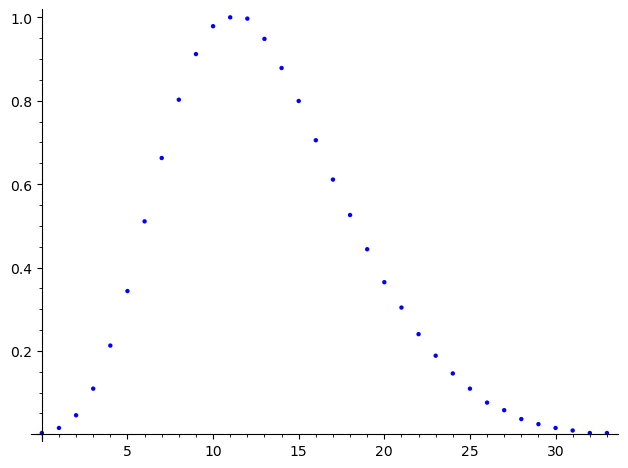

In [20]:
dessine(A)

In [60]:
L=[KacPolA(2, 3, i, 2)(1) for i in range(11)]

In [61]:
F=QQ['x']

In [62]:
F.lagrange_polynomial(enumerate(L)).factor()

x * (x^3 + 26/3*x^2 + 25/2*x - 25/6)

In [63]:
L

[0, 18, 127, 415, 994, 2000, 3593, 5957, 9300, 13854, 19875]

In [64]:
oeis(_)